In [1]:
#paths to the data sets
path="./glass_identification/glass.csv"

In [2]:
#read with pandas
import pandas as pd
#attach featurenames as described
columns=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe', 'Type_of_glass']
df=pd.read_csv(path, sep=',', decimal='.',index_col=0, header=None, names=columns)
#id number should be index to prevent leak info to the model
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
#check if the loaded data frame match with original source file.
df.shape

(214, 10)

In [4]:
df.dtypes

RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object

In [5]:
#sanitise data

In [6]:
#no need to drop NaN as dataset is specified to have none
#remove duplicate if have any
df=df.drop_duplicates()
df.shape
#droped 1 duplicate

(213, 10)

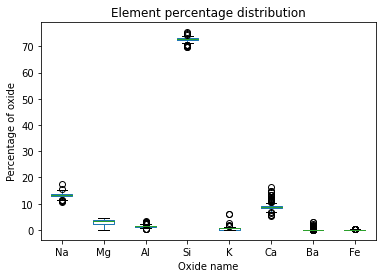

In [7]:
import matplotlib.pyplot as plt
df[['Na','Mg','Al','Si','K','Ca','Ba','Fe']].plot(kind='box', title='Element percentage distribution')
#Add labels
plt.ylabel('Percentage of oxide')
plt.xlabel('Oxide name')
plt.show()


In [8]:
#get statistical attributes and save them into a data frame
summary=df.describe()
summary

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
# calculate the whiskers values for each feature to handle outliers
# IQR = Q3-Q1
Q1=summary.loc['25%', :]
Q3=summary.loc['75%', :]
IQR= Q3-Q1
# upper whisker   
Q4=Q3+1.5*IQR
# lower whisker   
Q0=Q1-1.5*IQR

In [10]:
import numpy as np
x=Q4['RI']
y=Q0['RI']
#drop ourliers outside the whiskers
df.loc[df['RI']>x,'RI']=np.nan
df.loc[df['RI']<y,'RI']=np.nan
#replace with mean
df['RI'].fillna(df['RI'].mean(), inplace=True)
print(x, y)

1.5230949999999999 1.5125750000000002


C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

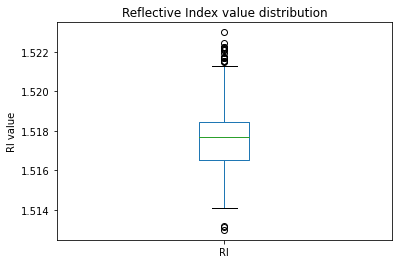

In [11]:
df[['RI']].plot(kind='box', title='Reflective Index value distribution')
#Add labels
plt.ylabel('RI value')
plt.show()

C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

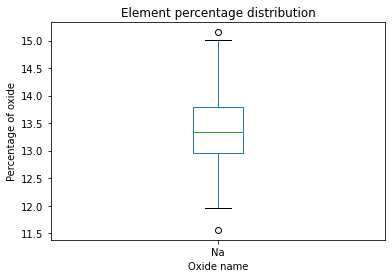

In [12]:
x=Q4['Na']
y=Q0['Na']
#drop ourliers outside the whiskers
df.loc[df['Na']>x,'Na']=np.nan
df.loc[df['Na']<y,'Na']=np.nan
#replace with mean
df['Na'].fillna(df['Na'].mean(), inplace=True)
df[['Na']].plot(kind='box', title='Element percentage distribution')
#Add labels
plt.ylabel('Percentage of oxide')
plt.xlabel('Oxide name')
plt.show()

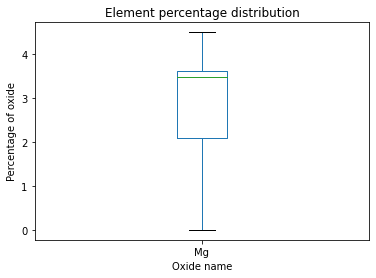

In [13]:
import matplotlib.pyplot as plt
df[['Mg']].plot(kind='box', title='Element percentage distribution')
#Add labels
plt.ylabel('Percentage of oxide')
plt.xlabel('Oxide name')
plt.show()
#no outliers :)

C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

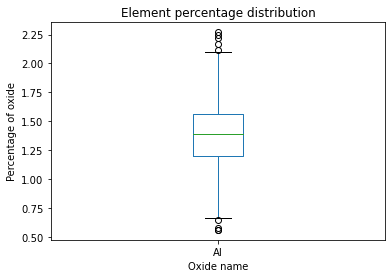

In [14]:
x=Q4['Al']
y=Q0['Al']
#drop ourliers outside the whiskers
df.loc[df['Al']>x,'Al']=np.nan
df.loc[df['Al']<y,'Al']=np.nan
#replace with mean
df['Al'].fillna(df['Al'].mean(), inplace=True)
df[['Al']].plot(kind='box', title='Element percentage distribution')
#Add labels
plt.ylabel('Percentage of oxide')
plt.xlabel('Oxide name')
plt.show()

C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

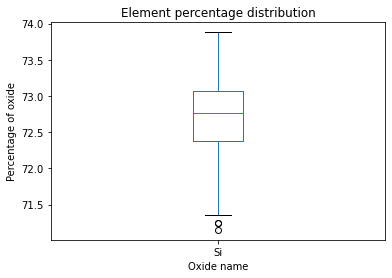

In [15]:
x=Q4['Si']
y=Q0['Si']
#drop ourliers outside the whiskers
df.loc[df['Si']>x,'Si']=np.nan
df.loc[df['Si']<y,'Si']=np.nan
#replace with mean
df['Si'].fillna(df['Si'].mean(), inplace=True)
df[['Si']].plot(kind='box', title='Element percentage distribution')
#Add labels
plt.ylabel('Percentage of oxide')
plt.xlabel('Oxide name')
plt.show()
#higer percentage compare to other, main component of all glass types.

C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

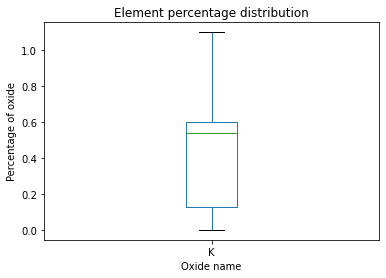

In [16]:
x=Q4['K']
y=Q0['K']
#drop ourliers outside the whiskers
df.loc[df['K']>x,'K']=np.nan
df.loc[df['K']<y,'K']=np.nan
#replace with mean
df['K'].fillna(df['K'].mean(), inplace=True)
df[['K']].plot(kind='box', title='Element percentage distribution')
#Add labels
plt.ylabel('Percentage of oxide')
plt.xlabel('Oxide name')
plt.show()

C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

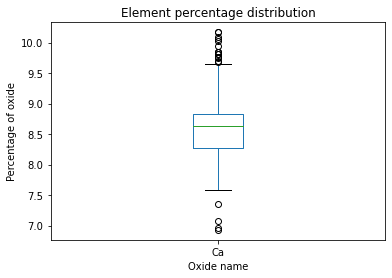

In [17]:
x=Q4['Ca']
y=Q0['Ca']
#drop ourliers outside the whiskers
df.loc[df['Ca']>x,'Ca']=np.nan
df.loc[df['Ca']<y,'Ca']=np.nan
#replace with mean
df['Ca'].fillna(df['Ca'].mean(), inplace=True)
df[['Ca']].plot(kind='box', title='Element percentage distribution')
#Add labels
plt.ylabel('Percentage of oxide')
plt.xlabel('Oxide name')
plt.show()

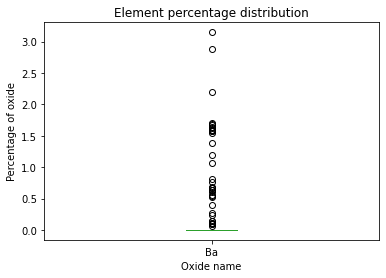

In [18]:
df[['Ba']].plot(kind='box', title='Element percentage distribution')
#Add labels
plt.ylabel('Percentage of oxide')
plt.xlabel('Oxide name')
plt.show()
#leave as not able to detect whiskers

C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\khoi1\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

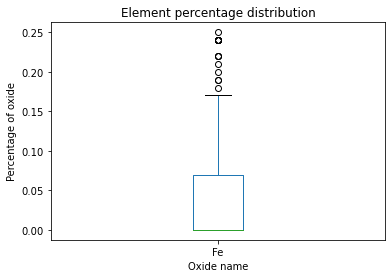

In [19]:
x=Q4['Fe']
y=Q0['Fe']
#drop ourliers outside the whiskers
df.loc[df['Fe']>x,'Fe']=np.nan
df.loc[df['Fe']<y,'Fe']=np.nan
#replace with mean
df['Fe'].fillna(df['Fe'].mean(), inplace=True)
df[['Fe']].plot(kind='box', title='Element percentage distribution')
#Add labels
plt.ylabel('Percentage of oxide')
plt.xlabel('Oxide name')
plt.show()

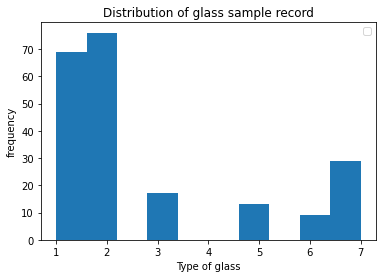

In [20]:
df[['Type_of_glass']].plot(kind='hist', title='Distribution of glass sample record')
#Add labels
plt.ylabel('frequency')
plt.xlabel('Type of glass')
plt.legend('')
plt.show()

In [21]:
# Hypothesis

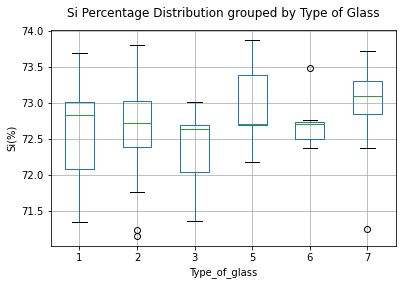

In [22]:
#1 Si is the most popular item in all types of glass, considering the pecentage distibution
#True more than 72% of Si found in each type of glass, pedict high popularity.
df.boxplot(column='Si',by='Type_of_glass')
plt.title('')  # Set an empty title
plt.ylabel('Si(%)')
plt.suptitle('Si Percentage Distribution grouped by Type of Glass')
plt.show()

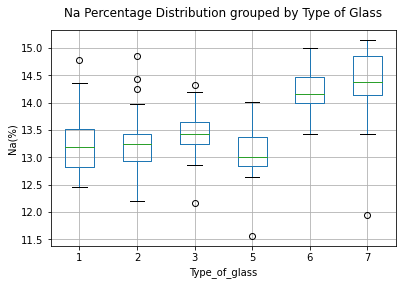

In [23]:
#2 all type of glasses contain a consolidate amount of Na
#true: each of them contain more than 12% of Na with type 6 and 7 amongs the top 2 with Na
df.boxplot(column='Na',by='Type_of_glass')
plt.title('')  # Set an empty title
plt.ylabel('Na(%)')
plt.suptitle('Na Percentage Distribution grouped by Type of Glass')
plt.show()

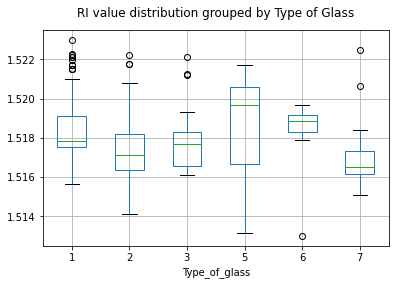

In [24]:
#3 RI could be used to difeerenticate type of glass
df.boxplot(column='RI',by='Type_of_glass')
plt.title('')  # Set an empty title
plt.suptitle('RI value distribution grouped by Type of Glass')
plt.show()

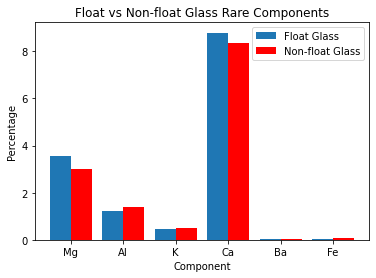

In [25]:
#1. float glass contain more than average percentage of Mg than the non float glass 1 vs glass 2
fl=df[df['Type_of_glass']==1]
nfl=df[df['Type_of_glass']==2]
fl=fl[['Mg','Al','K','Ca','Ba','Fe']].mean()
nfl=nfl[['Mg','Al','K','Ca','Ba','Fe']].mean()
import matplotlib.pyplot as plt

ind = range(len(fl))  # Create an index range for the bars
width = 0.4  # Set the width of each bar

# Plot the bars side by side
plt.bar(ind, fl, width, label='Float Glass')
plt.bar([i + width for i in ind], nfl, width, label='Non-float Glass', color='r')

plt.xlabel('Component')
plt.ylabel('Percentage')
plt.title('Float vs Non-float Glass Rare Components')
plt.legend()
plt.xticks([i + width/2 for i in ind], fl.index)  # Set x-axis ticks at the center of each group
plt.show()


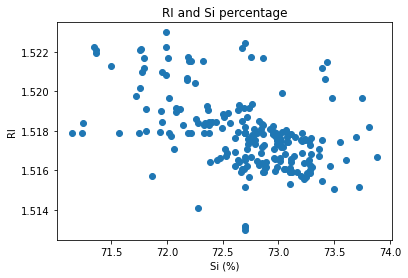

In [26]:
plt.scatter(df['Si'], df['RI'])
plt.ylabel('RI')
plt.xlabel('Si (%)')
plt.title('RI and Si percentage')

plt.show()

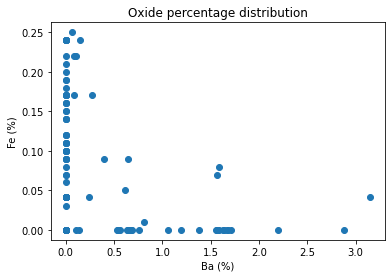

In [27]:
#2. As the Ba oxide percentage increases, the Fe oxide percentage instances decrease
#indicating a potential inverse relationship  Ba oxide percentages and the presence of Fe oxide.
plt.scatter(df['Ba'], df['Fe'])
plt.ylabel('Fe (%)')
plt.xlabel('Ba (%)')
plt.title('Oxide percentage distribution')

plt.show()

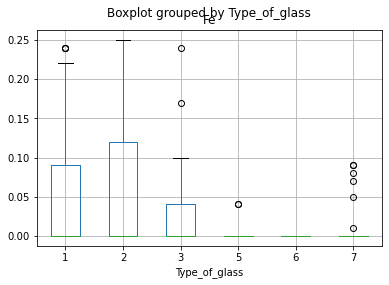

In [28]:
#4 Fe component `are rarely used in all glass tyope
#flase, used a small amount in type 1 2 and 3
df.boxplot(column='Fe',by='Type_of_glass')
plt.show()

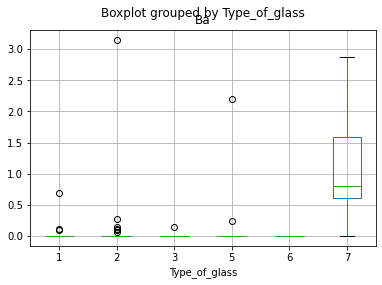

In [29]:
    #3 Ba component is rarely use in all glass types
    #false, type 7 used a noticable amount of Ba
    df.boxplot(column='Ba',by='Type_of_glass')
    plt.show()


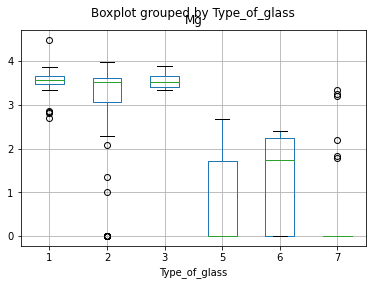

In [30]:
#4 
df.boxplot(column='Mg',by='Type_of_glass')
plt.show()

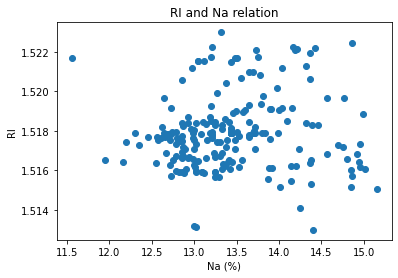

In [31]:
#Higher sodium content may affect the refractive index of the glass.
#False, no corelation
plt.scatter(df['Na'], df['RI'])
plt.ylabel('RI')
plt.xlabel('Na (%)')
plt.title('RI and Na relation')

plt.show()

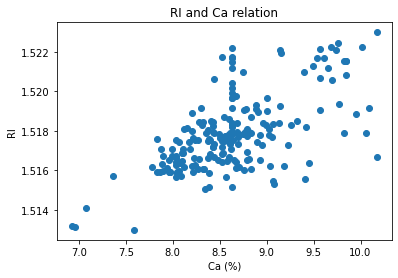

In [32]:
#Higher calcium content may affect the refractive index of the glass.
#False, no corelation
plt.scatter(df['Ca'], df['RI'])
plt.ylabel('RI')
plt.xlabel('Ca (%)')
plt.title('RI and Ca relation')

plt.show()

In [33]:
#data modeling
#initiate
df_data=df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]

df_target=df['Type_of_glass']

In [34]:
# Generate Train and test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_data,df_target,test_size=0.20,random_state=4)

In [35]:
#kneighbor classifier
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier(n_neighbors=3, weights='distance', p=2)
#fit the data (train the classifier)
fit1 = clf1.fit(X_train, y_train)
#test (predict)
y_pred1 = fit1.predict(X_test)
#evaluate
#confusion matrix
from sklearn.metrics import confusion_matrix
cm1 =confusion_matrix(y_test, y_pred1)


In [36]:
#accuracy score clf1
print("[train/test split] score: {:.5f}".format(clf1.score(X_test, y_test)))

[train/test split] score: 0.79070


In [37]:
#Decision Treee classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None,
#                        min_samples_split=2, min_samples_leaf=2, min_weight_fraction_leaf=0.0, 
#                        max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
#                        class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
# Initialisation
#
clf2 = DecisionTreeClassifier(min_samples_split=6,min_samples_leaf=3, min_weight_fraction_leaf = 0.1)
# train (FIT)
fit2 = clf2.fit(X_train,y_train)

# test(Predict)
y_pred2 = fit2.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred2)


In [39]:
#accuracy score clf2
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Accuracy Score:",metrics.accuracy_score(y_test, y_pred2))

Accuracy Score: 0.8372093023255814


In [40]:
from sklearn import tree
with open('df.dot','w') as f:
    f = tree.export_graphviz(clf2, out_file = f, 
                             feature_names = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'],
                             class_names = ['1', '2', '3', '5', '6', '7'],
                             filled=True, rounded = True, 
                             special_characters=True)

In [41]:
# hill clibing
import pylab as plt

from sklearn.utils import shuffle
X=df_data
col_num = X.shape[1]

new_Ind = []
cur_MaxScore = 0.0
col_Ind_Random = shuffle(range(0,col_num), random_state=4)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X.iloc[:, new_Ind].copy()
    X_train, X_test, y_train, y_test = train_test_split(newData, df_target, test_size=0.20, random_state=4)
    clf1 = KNeighborsClassifier(n_neighbors=3, weights='distance', p=2)
    fit = clf1.fit(X_train, y_train)
    cur_Score = clf1.score(X_test, y_test)
    if cur_Score< cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.46511627906976744
Score with 2 selected features: 0.5116279069767442
Score with 3 selected features: 0.5813953488372093
Score with 4 selected features: 0.7209302325581395
Score with 5 selected features: 0.7209302325581395
Score with 6 selected features: 0.7209302325581395
Score with 7 selected features: 0.7441860465116279
Score with 8 selected features: 0.7906976744186046
Score with 9 selected features: 0.7906976744186046


### 